In [2]:
# http://www.ics.uci.edu/~mohamadt/keras_mnist.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.utils import np_utils 

from keras.regularizers import l2

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("Original X Shape: {}".format(X_train.shape))
print("Original Y Shape: {}".format(Y_train.shape))

Original X Shape: (60000, 28, 28)
Original Y Shape: (60000,)


In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255



In [10]:
Y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)



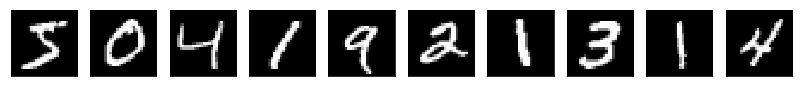

In [12]:
plt.figure(1, figsize=(14, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

In [14]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784, ), 
                kernel_regularizer=l2(0.001)))

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=100, verbose=1,
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0857 - acc: 0.9875 - val_loss: 0.1204 - val_acc: 0.9762

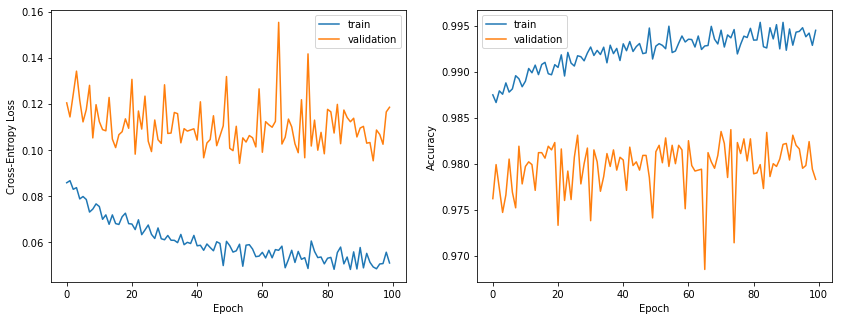

In [24]:
plt.figure(1, figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test across-entropy loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test across-entropy loss: 0.11846091171503068
Test accuracy: 0.9783
